In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [147]:
import datetime as dt
from datetime import timedelta, date


# Reflect Tables into SQLAlchemy ORM

In [45]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect, desc, and_, or_

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [110]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

#Print column names for the table 'measurement'
columns_m = inspector.get_columns('measurement')
for c in columns_m:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [109]:
#Print column names for the table 'station'
columns_s = inspector.get_columns('station')
for c in columns_s:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
#Measurement table contents
engine.execute('SELECT * FROM measurement').fetchall()


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

# Exploratory Climate Analysis

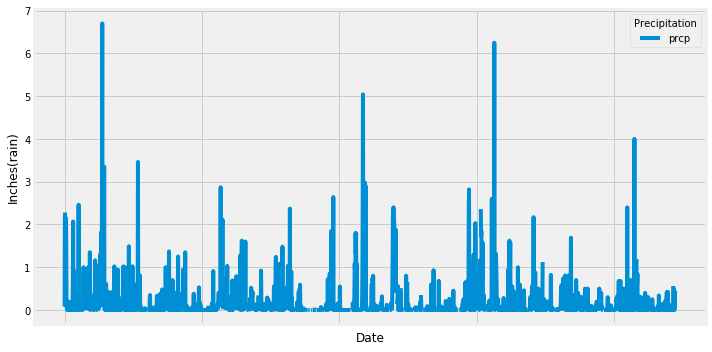

<Figure size 432x288 with 0 Axes>

In [173]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date 1 year ago from the last data point in the database
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
year_presp = session.query(*sel).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
presp_df = pd.DataFrame(year_presp)

# Sort the dataframe by date
sorted_df = presp_df.sort_values(by='date',ascending=True)
sorted_df.set_index('date').head()

# Use Pandas Plotting with Matplotlib to plot the data
presp_df.plot('date','prcp',figsize = (10,5))
plt.xlabel('Date')
plt.ylabel('Inches(rain)')
plt.legend(title = 'Precipitation', loc = 'best')
#plt.xticks(np.arange(1000,100), rotation=20)
plt.tight_layout()
plt.show()
plt.savefig("Images/Precipitation-barchart.png")

![precipitation](Images/precipitation.png)

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [18]:
# Design a query to show how many stations are available in this dataset?
station_num = session.query(Measurement).group_by(Measurement.station).count()
print('Total number of stations: ' + str(station_num))

Total number of stations: 9


In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station).label('st_count')
                              ).group_by(Measurement.station).order_by(desc('st_count')).all()

active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [43]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)
                        ).filter(Measurement.station == 'USC00519281').all()
                             
print('The lowest, highest and the average temperatures for most active stations are: '+ str(temp))

The lowest, highest and the average temperatures for most active stations are: [(54.0, 85.0, 71.66378066378067)]


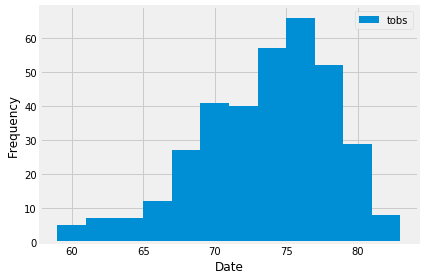

<Figure size 432x288 with 0 Axes>

In [174]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel_1 = [Measurement.date, Measurement.tobs]
year_tobs = session.query(*sel_1).\
    filter(and_(Measurement.date > last_year,Measurement.station == 'USC00519281')).\
    order_by(Measurement.date).all()

#Save the query results as a Pandas DataFrame 
tobs_df = pd.DataFrame(year_tobs)

#plot the results as a histogram
tobs_df.plot.hist('tobs', bins = 12)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
plt.savefig("Images/Tobs-hist.png")

![precipitation](Images/station-histogram.png)

In [52]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [152]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

trip_temp = calc_temps('2017-08-08', '2017-08-23')
#Storing values in variables
min_temp =(trip_temp[0][0])
avg_temp = (trip_temp[0][1])
max_temp = (trip_temp[0][2])


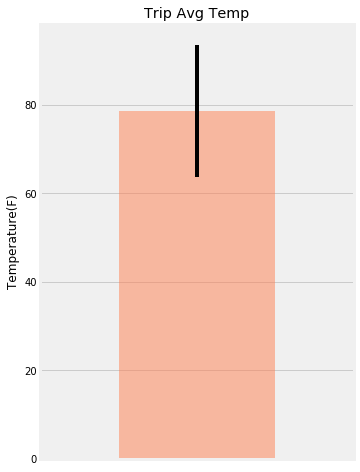

In [175]:
#Pandas Plotting with Matplotlib to plot the data
trip_temp_df = pd.DataFrame(trip_temp, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp_df = trip_temp_df['Avg Temp']

# Plot the results from your previous query as a bar chart. # Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
avg_temp_df.plot(kind = 'bar',figsize = (5,8), yerr =[max_temp-min_temp], alpha=0.5, color='coral' )

# Use "Trip Avg Temp" as your Title
plt.title("Trip Avg Temp")

# Use the average temperature for the y value
plt.ylabel("Temperature(F)")
plt.xticks([])

plt.savefig("Images/Trip Avg-barchart.png")

In [111]:
#Station table contents
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [135]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

total_data = session.query(
    Measurement.date, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation
).filter(Measurement.date >= '2017-08-08').filter(Measurement.date <= '2017-08-23').join(
    Station, Measurement.station == Station.station
      ).group_by(
    Measurement.station).order_by(desc(func.sum(Measurement.prcp))).all()

total_data

[('2017-08-08',
  'USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 ('2017-08-13',
  'USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 ('2017-08-08',
  'USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('2017-08-08',
  'USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('2017-08-08',
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0)]

## Optional Challenge Assignment

In [137]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [171]:
# calculate the daily normals for your trip

# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date
#Normals = map(list, normals)

#Normals

In [168]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [157]:
# Plot the daily normals as an area plot with `stacked=False`
